In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
import os
import cv2

In [8]:
im = cv2.imread('../data/train/n_00001.jpg')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))


<class 'numpy.ndarray'>
(256, 256, 3)
<class 'tuple'>


In [30]:
train_img=[]

test_img=[]
test_labels=[]

path_train=('../data/train')
path_test=('../data/test')

img_size=256

for i in os.listdir(path_train):
        train_img.append (cv2.resize(cv2.imread(path_train+'/'+i), (img_size,img_size))) 
#path_trainの中にあるファイル全てをimg_size,img_sizeにリサイズしてリストに追加する

train_img=np.array(train_img)#numpy配列に変更

df=pd.read_csv('../data/train.csv')
df=df.drop('image',axis=1)
train_labels=df.values.tolist()
test_labels=np.array(train_labels)


4238


In [37]:
# Data Augmentation
transforming_img_train = transforms.Compose([
    transforms.ToPILImage(),
    #transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(0,180)),
    transforms.ToTensor(),
    #transforms.RandomErasing(p=0.8, scale=(0.02, 0.33), ratio=(0.3, 3.3))
])

transforming_img_test = transforms.Compose([
    transforms.ToPILImage(),
    #transforms.Resize((150,150)),
    transforms.ToTensor(),
])

In [39]:
train_ds_il = [[transforming_img_train(train_img[i]), train_labels[i]] for i in range(len(train_img))]
#test_ds_il = [[transforming_img_test(test_img[i]), test_labels_encoded[i]] for i in range(len(test_img))]

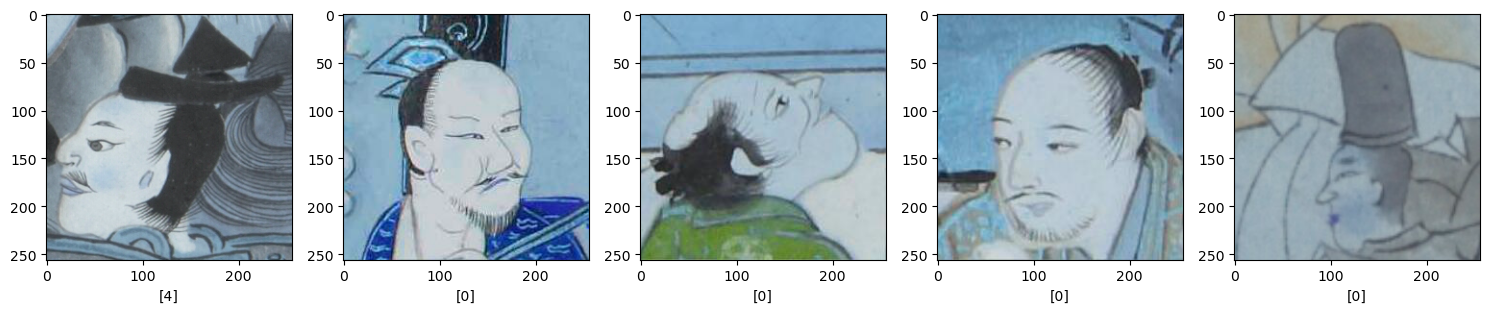

In [41]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

In [ ]:
config={
    'BatchSize':128,
    
}